# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    # индексы нулевых элементов
    zero_indices = np.where(arr == 0)[0]
    # Индексы после нулевых
    next_indices = zero_indices + 1
    # Отфильтровываем индексы
    valid_indices = next_indices[(next_indices < len(arr)) & (next_indices >= 0)]

    if len(valid_indices) == 0:
        return None

    # Возвращаем максимальный элемент среди следующих после нулевых
    return np.max(arr[valid_indices])

# Тест
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(f"Тест 1: {max_element(x)}")

x2 = np.array([1, 2, 3])
print(f"Тест 2: {max_element(x2)}")

Тест 1: 5
Тест 2: None


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    # Находим абсолютную разницу и возвращаем элемент с минимальной разницей
    return X.flat[np.argmin(np.abs(X - v))]

# Тест
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print(f"Ближайший к {v}: {nearest_value(X, v)}")

Ближайший к 3.6: 4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [5]:
def scale(X):
    # среднее по столбцам
    X_scaled = X - np.mean(X, axis=0)
    # стандартное отклонение по столбцам
    std = np.std(X, axis=0)
    # Заменяем нулевые стандартные отклонения на 1, чтобы избежать деления на ноль
    std[std == 0] = 1
    return X_scaled / std

# Тест
np.random.seed(42)
X_test = np.random.randint(0, 100, size=(5, 3))
print("Исходная матрица:")
print(X_test)
print("\nМасштабированная матрица:")
print(scale(X_test))
print("\nПроверка: среднее по столбцам ~ 0")
print(np.mean(scale(X_test), axis=0))
print("Проверка: std по столбцам ~ 1")
print(np.std(scale(X_test), axis=0))

Исходная матрица:
[[51 92 14]
 [71 60 20]
 [82 86 74]
 [74 87 99]
 [23  2 21]]

Масштабированная матрица:
[[-0.43361508  0.79149842 -0.9185736 ]
 [ 0.5090264  -0.16068013 -0.74416089]
 [ 1.02747921  0.61296494  0.82555349]
 [ 0.65042262  0.64272052  1.55227311]
 [-1.75331314 -1.88650376 -0.71509211]]

Проверка: среднее по столбцам ~ 0
[-8.88178420e-17 -1.33226763e-16 -4.44089210e-17]
Проверка: std по столбцам ~ 1
[1. 1. 1.]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [6]:
def get_stats(X):
    stats = {}

    # Определитель
    if X.shape[0] == X.shape[1]:
        stats['determinant'] = np.linalg.det(X)
    else:
        stats['determinant'] = "Не определен для неквадратной матрицы"

    # сумма диагональных элементов
    stats['trace'] = np.trace(X)

    # Минимальный и максимальный элементы
    stats['min_element'] = np.min(X)
    stats['max_element'] = np.max(X)

    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')

    # Собственные числа
    if X.shape[0] == X.shape[1]:
        stats['eigenvalues'] = np.linalg.eigvals(X)
    else:
        stats['eigenvalues'] = "Не определены для неквадратной матрицы"

    # Обратная матрица
    if X.shape[0] == X.shape[1] and np.linalg.det(X) != 0:
        stats['inverse'] = np.linalg.inv(X)
    else:
        stats['inverse'] = "Не определена"

    return stats

# Тест
np.random.seed(42)
X_test = np.random.normal(10, 1, size=(3, 3))
print("Тестовая матрица:")
print(X_test)
print("\nСтатистики:")
stats = get_stats(X_test)
for key, value in stats.items():
    if key in ['eigenvalues', 'inverse'] and isinstance(value, str):
        print(f"{key}: {value}")
    elif key == 'eigenvalues':
        print(f"{key}: {value}")
    elif key == 'inverse':
        print(f"{key}: \\n{value}")
    else:
        print(f"{key}: {value:.4f}")

Тестовая матрица:
[[10.49671415  9.8617357  10.64768854]
 [11.52302986  9.76584663  9.76586304]
 [11.57921282 10.76743473  9.53052561]]

Статистики:
determinant: 22.4038
trace: 29.7931
min_element: 9.5305
max_element: 11.5792
frobenius_norm: 31.3876
eigenvalues: [31.30028766+0.j        -0.75360063+0.3845192j -0.75360063-0.3845192j]
inverse: \n[[-0.53917888  0.9222003  -0.34259108]
 [ 0.14553242 -1.03788982  0.9009268 ]
 [ 0.49066089  0.05215424 -0.49669197]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [7]:
max_elements = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)

    # Перемножаем матрицы
    C = np.dot(A, B)

    # максимальный элемент
    max_elem = np.max(C)
    max_elements.append(max_elem)

# Преобразуем в numpy array
max_elements = np.array(max_elements)

mean_max = np.mean(max_elements)
percentile_95 = np.percentile(max_elements, 95)

print(f"Среднее значение максимальных элементов: {mean_max:.4f}")
print(f"95-процентная квантиль: {percentile_95:.4f}")
print(f"Минимальное значение: {np.min(max_elements):.4f}")
print(f"Максимальное значение: {np.max(max_elements):.4f}")

Среднее значение максимальных элементов: 8.2857
95-процентная квантиль: 11.6625
Минимальное значение: 4.6062
Максимальное значение: 12.8207


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [8]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [9]:
# Your code here

df = pd.read_csv('2008.csv')

# Анализ причин отмены рейсов
cancellation_counts = df['CancellationCode'].value_counts()
print("Распределение причин отмены рейсов:")
print(cancellation_counts)

# Самая частая причина
most_common_cancellation = cancellation_counts.index[0]
print(f"\nСамая частая причина отмены рейса: {most_common_cancellation}")

# Расшифровка кодов (из описания данных):
# A - Carrier (авиакомпания)
# B - Weather (погода)
# C - National Air System (национальная воздушная система)
# D - Security (безопасность)

Распределение причин отмены рейсов:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены рейса: A


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
# Your code here

# Статистика по расстояниям
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()

print(f"Статистика по пройденному расстоянию:")
print(f"Среднее расстояние: {mean_distance:.2f} миль")
print(f"Минимальное расстояние: {min_distance} миль")
print(f"Максимальное расстояние: {max_distance} миль")

# Анализ минимального расстояния
min_distance_flights = df[df['Distance'] == min_distance]
print(f"\nРейсы с минимальным расстоянием ({min_distance} миль):")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])

# Проверка этих же рейсов в другие дни
if not min_distance_flights.empty:
    carrier = min_distance_flights['UniqueCarrier'].iloc[0]
    flight_num = min_distance_flights['FlightNum'].iloc[0]
    origin = min_distance_flights['Origin'].iloc[0]
    dest = min_distance_flights['Dest'].iloc[0]

    same_route_flights = df[
        (df['UniqueCarrier'] == carrier) &
        (df['FlightNum'] == flight_num) &
        (df['Origin'] == origin) &
        (df['Dest'] == dest)
    ]

    print(f"\nВсе рейсы {carrier}{flight_num} {origin}-{dest}:")
    print(same_route_flights[['Year', 'Month', 'DayofMonth', 'Distance']].sort_values(['Year', 'Month', 'DayofMonth']))

Статистика по пройденному расстоянию:
Среднее расстояние: 724.51 миль
Минимальное расстояние: 31 миль
Максимальное расстояние: 4962 миль

Рейсы с минимальным расстоянием (31 миль):
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116   2008     12          30            AS         65    WRG  PSG        31
6958   2008     12          26            AS         65    WRG  PSG        31
17349  2008      8          18            AS         64    PSG  WRG        31
27534  2008      3          11            AS         64    PSG  WRG        31
46082  2008      8           9            AS         65    WRG  PSG        31
48112  2008      2          28            AS         64    PSG  WRG        31

Все рейсы AS65 WRG-PSG:
       Year  Month  DayofMonth  Distance
46082  2008      8           9        31
6958   2008     12          26        31
1116   2008     12          30        31


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [20]:
# Your code here
import pandas as pd

# Загрузка данных
df = pd.read_csv('2008.csv')

# Находим минимальное расстояние
min_distance = df['Distance'].min()
print(f"Минимальное пройденное расстояние: {min_distance} миль")

# Находим все рейсы с минимальным расстоянием
min_distance_flights = df[df['Distance'] == min_distance]
print(f"\nКоличество рейсов с минимальным расстоянием: {len(min_distance_flights)}")

# Выводим подробную информацию об этих рейсах
print("\nРейсы с минимальным расстоянием:")
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
                          'Origin', 'Dest', 'Distance', 'ActualElapsedTime', 'AirTime']])

# Анализируем каждый уникальный маршрут с минимальным расстоянием
unique_routes = min_distance_flights[['UniqueCarrier', 'FlightNum', 'Origin', 'Dest']].drop_duplicates()

print(f"\nУникальные маршруты с минимальным расстоянием ({len(unique_routes)}):")
for _, route in unique_routes.iterrows():
    carrier = route['UniqueCarrier']
    flight_num = route['FlightNum']
    origin = route['Origin']
    dest = route['Dest']

    print(f"\nМаршрут: {carrier}{flight_num} {origin} -> {dest}")

    # Находим ВСЕ рейсы этого маршрута
    all_route_flights = df[
        (df['UniqueCarrier'] == carrier) &
        (df['FlightNum'] == flight_num) &
        (df['Origin'] == origin) &
        (df['Dest'] == dest)
    ]

    print(f"Всего рейсов на этом маршруте: {len(all_route_flights)}")

    # Статистика по расстояниям на этом маршруте
    distance_stats = all_route_flights['Distance'].describe()
    print(f"Расстояние: min={distance_stats['min']}, max={distance_stats['max']}, mean={distance_stats['mean']:.1f}")

    # Показываем несколько примеров
    print("Примеры рейсов:")
    print(all_route_flights[['Year', 'Month', 'DayofMonth', 'Distance']].head(10).to_string(index=False))

Минимальное пройденное расстояние: 31 миль

Количество рейсов с минимальным расстоянием: 6

Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum Origin  \
1116   2008     12          30          2            AS         65    WRG   
6958   2008     12          26          5            AS         65    WRG   
17349  2008      8          18          1            AS         64    PSG   
27534  2008      3          11          2            AS         64    PSG   
46082  2008      8           9          6            AS         65    WRG   
48112  2008      2          28          4            AS         64    PSG   

      Dest  Distance  ActualElapsedTime  AirTime  
1116   PSG        31               25.0     13.0  
6958   PSG        31                NaN      NaN  
17349  WRG        31                NaN      NaN  
27534  WRG        31               19.0     10.0  
46082  PSG        31               36.0      8.0  
48112  WRG        31         

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [13]:
# Your code here

# Подсчет вылетов по аэропортам
departure_counts = df['Origin'].value_counts()
top_airport = departure_counts.index[0]
top_count = departure_counts.iloc[0]

print(f"Топ-5 аэропортов по количеству вылетов:")
print(departure_counts.head())
print(f"\nАэропорт с наибольшим количеством вылетов: {top_airport}")
print(f"Количество вылетов: {top_count}")

# Для определения города потребуется дополнительная информация
# Обычно ATL - Atlanta, ORD - Chicago, DFW - Dallas/Fort Worth и т.д.

Топ-5 аэропортов по количеству вылетов:
Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
Name: count, dtype: int64

Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [14]:
# Your code here
mean_airtime_by_origin = df.groupby('Origin')['AirTime'].mean()

# Сортировка по убыванию
sorted_airtimes = mean_airtime_by_origin.sort_values(ascending=False)

print("Топ-10 аэропортов по среднему времени полета:")
print(sorted_airtimes.head(10))

top_airport = sorted_airtimes.index[0]
top_airtime = sorted_airtimes.iloc[0]

print(f"\nАэропорт с наибольшим средним временем полета: {top_airport}")
print(f"Среднее время полета: {top_airtime:.2f} минут")

Топ-10 аэропортов по среднему времени полета:
Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
JFK    162.600515
SEA    154.622744
STX    153.000000
EWR    142.087444
ADK    142.000000
Name: AirTime, dtype: float64

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [15]:
# Your code here
departure_stats = df.groupby('Origin').agg(
    total_flights=('DepDelay', 'count'),
    delayed_flights=('DepDelay', lambda x: (x > 0).sum())
)

# Фильтрация аэропортов с >= 1000 рейсов
filtered_airports = departure_stats[departure_stats['total_flights'] >= 1000]

# Вычисление доли задержанных рейсов
filtered_airports['delay_ratio'] = filtered_airports['delayed_flights'] / filtered_airports['total_flights']

# Сортировка по доле задержек
sorted_by_delay_ratio = filtered_airports.sort_values('delay_ratio', ascending=False)

print("Топ-10 аэропортов по доле задержанных рейсов (>=1000 рейсов):")
print(sorted_by_delay_ratio[['total_flights', 'delayed_flights', 'delay_ratio']].head(10))

top_delay_airport = sorted_by_delay_ratio.index[0]
top_delay_ratio = sorted_by_delay_ratio['delay_ratio'].iloc[0]
total_flights = sorted_by_delay_ratio['total_flights'].iloc[0]

print(f"\nАэропорт с наибольшей долей задержанных рейсов: {top_delay_airport}")
print(f"Доля задержанных рейсов: {top_delay_ratio:.2%}")
print(f"Общее количество рейсов: {total_flights}")

Топ-10 аэропортов по доле задержанных рейсов (>=1000 рейсов):
        total_flights  delayed_flights  delay_ratio
Origin                                             
EWR              1343              710     0.528667
ORD              3391             1649     0.486287
IAH              1770              841     0.475141
DFW              2730             1283     0.469963
BWI              1018              467     0.458743
DEN              2353             1063     0.451764
SEA              1114              495     0.444345
LAS              1773              779     0.439368
PHL              1007              432     0.428997
PHX              2011              858     0.426653

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 52.87%
Общее количество рейсов: 1343


/tmp/ipython-input-2900183568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_airports['delay_ratio'] = filtered_airports['delayed_flights'] / filtered_airports['total_flights']


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [34]:
# Your code here
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('2008.csv')

print("=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===\n")

# 1. Имеются ли в данных пропущенные значения?
has_missing_values = df.isnull().any().any()
print(f"1. Имеются ли в данных пропущенные значения? {'ДА' if has_missing_values else 'НЕТ'}")

# 2. Сколько всего пропущенных элементов в таблице "объект-признак"?
total_missing = df.isnull().sum().sum()
print(f"2. Всего пропущенных элементов в таблице: {total_missing}")

# 3. Сколько объектов имеют хотя бы один пропуск?
objects_with_missing = df.isnull().any(axis=1).sum()
print(f"3. Количество объектов (строк) с хотя бы одним пропуском: {objects_with_missing}")
print(f"   Процент объектов с пропусками: {objects_with_missing/len(df)*100:.2f}%")

# 4. Сколько признаков имеют хотя бы одно пропущенное значение?
features_with_missing = df.isnull().any(axis=0).sum()
print(f"4. Количество признаков (столбцов) с хотя бы одним пропуском: {features_with_missing}")
print(f"   Процент признаков с пропусками: {features_with_missing/len(df.columns)*100:.2f}%")

# Дополнительная детализация
print(f"\n=== ДЕТАЛЬНАЯ СТАТИСТИКА ===")
print(f"Общее количество объектов (строк): {len(df)}")
print(f"Общее количество признаков (столбцов): {len(df.columns)}")
print(f"Общее количество ячеек в таблице: {len(df) * len(df.columns)}")
print(f"Процент пропущенных значений от общего числа: {total_missing/(len(df)*len(df.columns))*100:.4f}%")

=== АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===

1. Имеются ли в данных пропущенные значения? ДА
2. Всего пропущенных элементов в таблице: 355215
3. Количество объектов (строк) с хотя бы одним пропуском: 70000
   Процент объектов с пропусками: 100.00%
4. Количество признаков (столбцов) с хотя бы одним пропуском: 16
   Процент признаков с пропусками: 55.17%

=== ДЕТАЛЬНАЯ СТАТИСТИКА ===
Общее количество объектов (строк): 70000
Общее количество признаков (столбцов): 29
Общее количество ячеек в таблице: 2030000
Процент пропущенных значений от общего числа: 17.4983%


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [35]:
# Your code here
# Предположим, что целевая переменная - это задержка вылета (DepDelay)
target_column = 'DepDelay'

# 1. Имеются ли пропущенные значения?
missing_in_target = df[target_column].isnull().sum()
print(f"1. Пропущенных значений в целевой переменной '{target_column}': {missing_in_target}")
print(f"   Процент пропусков: {missing_in_target/len(df)*100:.2f}%")

# 2. Анализ объектов с пропущенными значениями
if missing_in_target > 0:
    missing_target_rows = df[df[target_column].isnull()]
    print(f"\n2. АНАЛИЗ ОБЪЕКТОВ С ПРОПУСКАМИ В ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
    print(f"   Всего таких объектов: {len(missing_target_rows)}")

    # Анализ общих характеристик
    print(f"\n   Общие характеристики объектов с пропуском '{target_column}':")

    # Проверяем статус отмены рейсов
    cancellation_status = missing_target_rows['Cancelled'].value_counts()
    print(f"   Статус отмены рейсов:")
    for status, count in cancellation_status.items():
        print(f"     Cancelled={status}: {count} рейсов")

    # Проверяем, есть ли другие пропуски в этих строках
    other_missing = missing_target_rows.isnull().sum(axis=1)
    print(f"\n   Другие пропуски в этих строках:")
    print(f"     Среднее количество пропусков на строку: {other_missing.mean():.2f}")

    # Анализ конкретных столбцов с пропусками
    print(f"\n   Столбцы с пропусками в этих объектах:")
    missing_cols_analysis = missing_target_rows.isnull().sum()
    missing_cols_analysis = missing_cols_analysis[missing_cols_analysis > 0].sort_values(ascending=False)

    for col, count in missing_cols_analysis.items():
        percentage = (count / len(missing_target_rows)) * 100
        print(f"     {col}: {count} пропусков ({percentage:.1f}% от этих объектов)")

    # Анализ времени вылета и прилета
    print(f"\n   Анализ временных характеристик:")
    dep_time_missing = missing_target_rows['DepTime'].isnull().sum()
    arr_time_missing = missing_target_rows['ArrTime'].isnull().sum()
    print(f"     Пропусков DepTime: {dep_time_missing} ({dep_time_missing/len(missing_target_rows)*100:.1f}%)")
    print(f"     Пропусков ArrTime: {arr_time_missing} ({arr_time_missing/len(missing_target_rows)*100:.1f}%)")

    # Проверяем отмененные рейсы
    cancelled_with_missing_target = missing_target_rows[missing_target_rows['Cancelled'] == 1]
    print(f"\n   Отмененные рейсы среди объектов с пропуском целевой переменной: {len(cancelled_with_missing_target)}")

    # Анализ причин отмены
    if len(cancelled_with_missing_target) > 0:
        cancellation_codes = cancelled_with_missing_target['CancellationCode'].value_counts()
        print(f"   Причины отмены:")
        for code, count in cancellation_codes.items():
            reason = {
                'A': 'Carrier (Авиакомпания)',
                'B': 'Weather (Погода)',
                'C': 'National Air System',
                'D': 'Security (Безопасность)'
            }.get(code, f'Unknown ({code})')
            print(f"     {code} - {reason}: {count} рейсов")

# # 3. ОБОСНОВАНИЕ ДЛЯ ИСКЛЮЧЕНИЯ ПРИЗНАКОВ
# print(f"\n3. ОБОСНОВАНИЕ ДЛЯ ИСКЛЮЧЕНИЯ ПРИЗНАКОВ:")
# print("   На основе анализа можно сделать вывод:")
# print("   - Пропуски в целевой переменной связаны с отмененными рейсами")
# print("   - Для отмененных рейсов многие временные показатели (DepTime, ArrTime, etc.) не имеют смысла")
# print("   - Рекомендуется исключить временные признаки, которые дублируют информацию или нерелевантны")

# Признаки для исключения (обоснование в комментариях)
columns_to_exclude = [
    'Cancelled',        # Информация уже учтена при фильтрации
    'CancellationCode', # Информация уже учтена при фильтрации
    'Diverted',         # Рейсы с перенаправлением могут требовать отдельного анализа
    # Временные признаки, которые могут быть избыточными:
    'CRSDepTime',       # Плановое время вылета
    'CRSArrTime',       # Плановое время прилета
    'CRSElapsedTime',   # Плановое время в пути
]

print(f"\n   Предлагается исключить признаки: {columns_to_exclude}")

# 4. ПРЕОБРАЗОВАНИЕ ДАННЫХ
print(f"\n4. ПРЕОБРАЗОВАНИЕ ДАННЫХ:")

# Исходный размер
original_size = len(df)
print(f"   Исходный размер датасета: {original_size} строк")

# Исключаем объекты с пропущенным значением целевой переменной
df_clean = df.dropna(subset=[target_column])
after_missing_removal = len(df_clean)
print(f"   После удаления пропусков в '{target_column}': {after_missing_removal} строк")

# Исключаем объекты с целевой переменной равной 0
df_clean = df_clean[df_clean[target_column] != 0]
after_zero_removal = len(df_clean)
print(f"   После удаления '{target_column} = 0': {after_zero_removal} строк")

# Исключаем предложенные признаки
columns_to_keep = [col for col in df_clean.columns if col not in columns_to_exclude]
df_clean = df_clean[columns_to_keep]
print(f"   После исключения {len(columns_to_exclude)} признаков: {df_clean.shape[1]} столбцов")

# Выделяем целевую переменную
X = df_clean.drop(columns=[target_column])  # Матрица "объект-признак"
y = df_clean[target_column]                # Вектор целевой переменной

print(f"\n   ФИНАЛЬНЫЕ РАЗМЕРЫ:")
print(f"   X (объект-признак): {X.shape}")
print(f"   y (целевая переменная): {y.shape}")
print(f"   Удалено всего: {original_size - len(X)} строк ({((original_size - len(X))/original_size)*100:.1f}%)")

# # Дополнительная информация о целевой переменной
# print(f"\n   СТАТИСТИКА ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (после очистки):")
# print(f"   Минимум: {y.min()}")
# print(f"   Максимум: {y.max()}")
# print(f"   Среднее: {y.mean():.2f}")
# print(f"   Медиана: {y.median():.2f}")
# print(f"   Стандартное отклонение: {y.std():.2f}")

# # Проверка на оставшиеся пропуски
# remaining_missing = X.isnull().sum().sum()
# print(f"\n   Оставшиеся пропуски в матрице X: {remaining_missing}")

1. Пропущенных значений в целевой переменной 'DepDelay': 1399
   Процент пропусков: 2.00%

2. АНАЛИЗ ОБЪЕКТОВ С ПРОПУСКАМИ В ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
   Всего таких объектов: 1399

   Общие характеристики объектов с пропуском 'DepDelay':
   Статус отмены рейсов:
     Cancelled=1: 1399 рейсов

   Другие пропуски в этих строках:
     Среднее количество пропусков на строку: 13.59

   Столбцы с пропусками в этих объектах:
     DepTime: 1399 пропусков (100.0% от этих объектов)
     ArrTime: 1399 пропусков (100.0% от этих объектов)
     ActualElapsedTime: 1399 пропусков (100.0% от этих объектов)
     ArrDelay: 1399 пропусков (100.0% от этих объектов)
     AirTime: 1399 пропусков (100.0% от этих объектов)
     TaxiIn: 1399 пропусков (100.0% от этих объектов)
     DepDelay: 1399 пропусков (100.0% от этих объектов)
     WeatherDelay: 1399 пропусков (100.0% от этих объектов)
     NASDelay: 1399 пропусков (100.0% от этих объектов)
     TaxiOut: 1399 пропусков (100.0% от этих объектов)
     CarrierDela

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [36]:
# Your code here

print("=== ПРЕОБРАЗОВАНИЕ ВРЕМЕННЫХ ПРИЗНАКОВ ИЗ ФОРМАТА HHMM ===\n")

# Временные признаки для преобразования
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

print("Исходные временные признаки для преобразования:")
for col in time_columns:
    if col in df.columns:
        sample_values = df[col].dropna().head(3).tolist()
        print(f"  {col}: примеры значений {sample_values}")
    else:
        print(f"  {col}: отсутствует в данных")

def convert_hhmm_to_hour_minute(series):
    """
    Преобразует серию из формата HHMM в две серии: часы и минуты
    """
    # Создаем новые серии с NaN значениями
    hour_series = series.copy().astype(float)
    minute_series = series.copy().astype(float)

    # Заполняем значениями только там, где нет пропусков
    non_null_mask = series.notna()

    # Преобразуем значения
    hour_series[non_null_mask] = (series[non_null_mask] // 100).astype(int)
    minute_series[non_null_mask] = (series[non_null_mask] % 100).astype(int)

    # Для пропусков оставляем NaN
    hour_series[~non_null_mask] = np.nan
    minute_series[~non_null_mask] = np.nan

    return hour_series, minute_series

# Применяем преобразование ко всем временным признакам
print(f"\nПреобразование признаков:")
for time_col in time_columns:
    if time_col in df.columns:
        print(f"  Обрабатывается {time_col}...")

        # Преобразуем в часы и минуты
        hour_series, minute_series = convert_hhmm_to_hour_minute(df[time_col])

        # Создаем новые названия столбцов
        hour_col = f"{time_col}_Hour"
        minute_col = f"{time_col}_Minute"

        # Добавляем новые столбцы
        df[hour_col] = hour_series
        df[minute_col] = minute_series

        # Проверяем преобразование на примерах
        sample_original = df[time_col].dropna().head(3)
        if len(sample_original) > 0:
            print(f"    Примеры преобразования:")
            for orig_val in sample_original:
                hour_val = orig_val // 100
                minute_val = orig_val % 100
                print(f"      {int(orig_val)} -> час: {hour_val}, минуты: {minute_val}")

# Удаляем исходные временные признаки
print(f"\nУдаление исходных временных признаков:")
df = df.drop(columns=time_columns)

# Проверяем результат
print(f"\n=== РЕЗУЛЬТАТ ПРЕОБРАЗОВАНИЯ ===")
print(f"Общее количество столбцов после преобразования: {len(df.columns)}")

# Показываем новые столбцы
new_time_columns = []
for time_col in time_columns:
    hour_col = f"{time_col}_Hour"
    minute_col = f"{time_col}_Minute"
    if hour_col in df.columns and minute_col in df.columns:
        new_time_columns.extend([hour_col, minute_col])

print(f"\nСозданные новые столбцы ({len(new_time_columns)}):")
for col in new_time_columns:
    non_null_count = df[col].notna().sum()
    null_count = df[col].isna().sum()
    print(f"  {col}: {non_null_count} значений, {null_count} пропусков")

# Проверяем корректность преобразования на нескольких примерах
print(f"\n=== ПРОВЕРКА КОРРЕКТНОСТИ ПРЕОБРАЗОВАНИЯ ===")
check_columns = []
for time_col in time_columns:
    hour_col = f"{time_col}_Hour"
    minute_col = f"{time_col}_Minute"
    if hour_col in df.columns and minute_col in df.columns:
        check_columns.extend([hour_col, minute_col])

if check_columns:
    # Берем несколько строк для проверки
    sample_df = df[check_columns].dropna().head(5)
    print("Примеры преобразованных значений:")
    print(sample_df.to_string())

# Проверяем обработку пропусков
print(f"\n=== ПРОВЕРКА ОБРАБОТКИ ПРОПУСКОВ ===")
for time_col in time_columns:
    hour_col = f"{time_col}_Hour"
    minute_col = f"{time_col}_Minute"

    if hour_col in df.columns and minute_col in df.columns:
        # Проверяем, что пропуски сохранились корректно
        original_nulls = df[time_col].isna().sum() if time_col in df.columns else "удален"
        hour_nulls = df[hour_col].isna().sum()
        minute_nulls = df[minute_col].isna().sum()

        print(f"{time_col}:")
        print(f"  Исходные пропуски: {original_nulls}")
        print(f"  Пропуски в {hour_col}: {hour_nulls}")
        print(f"  Пропуски в {minute_col}: {minute_nulls}")
        print(f"  Корректность: {'ДА' if hour_nulls == minute_nulls else 'НЕТ'}")

# Статистика по новым признакам
print(f"\n=== СТАТИСТИКА ПО НОВЫМ ПРИЗНАКАМ ===")
for time_col in time_columns:
    hour_col = f"{time_col}_Hour"
    minute_col = f"{time_col}_Minute"

    if hour_col in df.columns and minute_col in df.columns:
        print(f"\n{time_col.replace('Time', '')} время:")
        print(f"  Часы: min={df[hour_col].min()}, max={df[hour_col].max()}, mean={df[hour_col].mean():.1f}")
        print(f"  Минуты: min={df[minute_col].min()}, max={df[minute_col].max()}, mean={df[minute_col].mean():.1f}")

# print(f"\n=== ИТОГ ===")
# print(f"Исходные столбцы: {time_columns}")
# print(f"Удалено столбцов: {len(time_columns)}")
# print(f"Добавлено столбцов: {len(new_time_columns)}")
# print(f"Общее изменение: +{len(new_time_columns) - len(time_columns)} столбцов")

=== ПРЕОБРАЗОВАНИЕ ВРЕМЕННЫХ ПРИЗНАКОВ ИЗ ФОРМАТА HHMM ===

Исходные временные признаки для преобразования:
  DepTime: примеры значений [2111.0, 1426.0, 1143.0]
  CRSDepTime: примеры значений [2055, 1410, 1145]
  ArrTime: примеры значений [2308.0, 1730.0, 1501.0]
  CRSArrTime: примеры значений [2300, 1728, 1520]

Преобразование признаков:
  Обрабатывается DepTime...
    Примеры преобразования:
      2111 -> час: 21.0, минуты: 11.0
      1426 -> час: 14.0, минуты: 26.0
      1143 -> час: 11.0, минуты: 43.0
  Обрабатывается CRSDepTime...
    Примеры преобразования:
      2055 -> час: 20, минуты: 55
      1410 -> час: 14, минуты: 10
      1145 -> час: 11, минуты: 45
  Обрабатывается ArrTime...
    Примеры преобразования:
      2308 -> час: 23.0, минуты: 8.0
      1730 -> час: 17.0, минуты: 30.0
      1501 -> час: 15.0, минуты: 1.0
  Обрабатывается CRSArrTime...
    Примеры преобразования:
      2300 -> час: 23, минуты: 0
      1728 -> час: 17, минуты: 28
      1520 -> час: 15, минуты: 20


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [37]:
# Your code here

import matplotlib.pyplot as plt
import seaborn as sns

print("=== АНАЛИЗ И ИСКЛЮЧЕНИЕ СИЛЬНО КОРРЕЛИРУЮЩИХ ПРИЗНАКОВ ===\n")

# Целевая переменная - задержка вылета (DepDelay)
target_column = 'DepDelay'

# 1. Исключаем TailNum и Year как указано в задании
print("1. ОБЯЗАТЕЛЬНОЕ ИСКЛЮЧЕНИЕ:")
print("   Исключаем TailNum (номер самолета) - категориальный признак с высокой кардинальностью")
print("   Исключаем Year (год) - все данные за 2008 год, нет вариативности")

columns_to_exclude = ['TailNum', 'Year']

# 2. Анализ корреляции с целевой переменной
print(f"\n2. АНАЛИЗ КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ '{target_column}':")

# Вычисляем корреляцию для числовых признаков
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_with_target = df[numeric_columns].corr()[target_column].abs().sort_values(ascending=False)

print("Корреляция числовых признаков с целевой переменной (по убыванию модуля):")
for feature, corr in correlation_with_target.head(15).items():
    if feature != target_column:
        print(f"   {feature}: {corr:.4f}")

# 3. Анализ смысловой корреляции
print(f"\n3. СМЫСЛОВОЙ АНАЛИЗ ПРИЗНАКОВ:")

# Признаки, которые напрямую содержат информацию о задержке
high_correlation_features = [
    'ArrDelay',           # Задержка прилета - напрямую связана с задержкой вылета
    'DepDelay',           # Целевая переменная (не исключаем, но учитываем)
    'CarrierDelay',       # Задержка по вине авиакомпании - часть общей задержки
    'WeatherDelay',       # Задержка из-за погоды - часть общей задержки
    'NASDelay',          # Задержка национальной воздушной системы - часть общей задержки
    'SecurityDelay',     # Задержка безопасности - часть общей задержки
    'LateAircraftDelay', # Задержка из-за опоздания самолета - часть общей задержки
]

print("Признаки, напрямую содержащие информацию о задержках:")
for feature in high_correlation_features:
    if feature in df.columns:
        corr = abs(df[feature].corr(df[target_column])) if df[feature].dtype in [np.int64, np.float64] else "N/A"
        print(f"   {feature}: корреляция = {corr}")

# 4. Анализ производных временных признаков
print(f"\n4. АНАЛИЗ ПРОИЗВОДНЫХ ПРИЗНАКОВ:")

# Признаки, которые являются производными от целевой переменной
derived_features = [
    'ActualElapsedTime',  # Фактическое время в пути
    'CRSElapsedTime',     # Плановое время в пути
    'AirTime',           # Время в воздухе
]

print("Производные временные признаки:")
for feature in derived_features:
    if feature in df.columns:
        corr = abs(df[feature].corr(df[target_column]))
        print(f"   {feature}: корреляция с {target_column} = {corr:.4f}")

# 5. Обоснование исключения признаков
print(f"\n5. ОБОСНОВАНИЕ ИСКЛЮЧЕНИЯ ПРИЗНАКОВ:")

# Добавляем сильно коррелирующие признаки к исключаемым
strong_correlated_to_exclude = [
    'ArrDelay',           # Слишком сильная корреляция с целевой переменной
    'CarrierDelay',      # Прямая составляющая задержки
    'WeatherDelay',      # Прямая составляющая задержки
    'NASDelay',          # Прямая составляющая задержки
    'SecurityDelay',     # Прямая составляющая задержки
    'LateAircraftDelay', # Прямая составляющая задержки
]

print("Признаки для исключения из-за сильной корреляции:")
for feature in strong_correlated_to_exclude:
    if feature in df.columns:
        print(f"   {feature} - содержит прямую информацию о задержке")

# Также исключаем некоторые производные признаки
additional_to_exclude = [
    'ActualElapsedTime',  # Сильно зависит от задержки вылета
]

print("\nДополнительные признаки для исключения:")
for feature in additional_to_exclude:
    if feature in df.columns:
        corr = abs(df[feature].corr(df[target_column]))
        print(f"   {feature} - корреляция с целевой = {corr:.4f}")

# Объединяем все исключаемые признаки
all_columns_to_exclude = list(set(columns_to_exclude + strong_correlated_to_exclude + additional_to_exclude))

# Убедимся, что не исключаем целевую переменную
if target_column in all_columns_to_exclude:
    all_columns_to_exclude.remove(target_column)

print(f"\n6. ИТОГОВЫЙ СПИСОК ИСКЛЮЧАЕМЫХ ПРИЗНАКОВ ({len(all_columns_to_exclude)}):")
for col in sorted(all_columns_to_exclude):
    print(f"   - {col}")


# 8. Применяем исключение признаков
print(f"\n8. ПРИМЕНЕНИЕ ИСКЛЮЧЕНИЯ ПРИЗНАКОВ:")

original_columns = len(df.columns)
print(f"   Исходное количество признаков: {original_columns}")

# Исключаем признаки
df_clean = df.drop(columns=[col for col in all_columns_to_exclude if col in df.columns])

final_columns = len(df_clean.columns)
print(f"   Количество признаков после исключения: {final_columns}")
print(f"   Исключено признаков: {original_columns - final_columns}")

# Проверяем, что целевая переменная осталась
if target_column in df_clean.columns:
    print(f"   Целевая переменная '{target_column}' сохранена")

# Показываем оставшиеся признаки
print(f"\nОСТАВШИЕСЯ ПРИЗНАКИ ({len(df_clean.columns)}):")
for col in sorted(df_clean.columns):
    print(f"   {col}")

# 9. Анализ оставшихся признаков
print(f"\n9. АНАЛИЗ ОСТАВШИХСЯ ПРИЗНАКОВ:")

remaining_numeric = df_clean.select_dtypes(include=[np.number]).columns
if target_column in remaining_numeric:
    remaining_corr = df_clean[remaining_numeric].corr()[target_column].abs().sort_values(ascending=False)

    print("Корреляция оставшихся признаков с целевой переменной:")
    for feature, corr in remaining_corr.head(10).items():
        if feature != target_column:
            print(f"   {feature}: {corr:.4f}")

=== АНАЛИЗ И ИСКЛЮЧЕНИЕ СИЛЬНО КОРРЕЛИРУЮЩИХ ПРИЗНАКОВ ===

1. ОБЯЗАТЕЛЬНОЕ ИСКЛЮЧЕНИЕ:
   Исключаем TailNum (номер самолета) - категориальный признак с высокой кардинальностью
   Исключаем Year (год) - все данные за 2008 год, нет вариативности

2. АНАЛИЗ КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'DepDelay':
Корреляция числовых признаков с целевой переменной (по убыванию модуля):
   ArrDelay: 0.9300
   LateAircraftDelay: 0.5582
   CarrierDelay: 0.5356
   WeatherDelay: 0.2401
   DepTime_Hour: 0.1983
   NASDelay: 0.1624
   CRSDepTime_Hour: 0.1372
   CRSArrTime_Hour: 0.1328
   TaxiOut: 0.0978
   ArrTime_Hour: 0.0698
   ActualElapsedTime: 0.0412
   CRSElapsedTime: 0.0339
   Month: 0.0276
   AirTime: 0.0251

3. СМЫСЛОВОЙ АНАЛИЗ ПРИЗНАКОВ:
Признаки, напрямую содержащие информацию о задержках:
   ArrDelay: корреляция = 0.9300459556101521
   DepDelay: корреляция = 1.0
   CarrierDelay: корреляция = 0.5355795415249588
   WeatherDelay: корреляция = 0.24009577166315188
   NASDelay: корреляция = 0.1623867340

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [ ]:
X['DepTime_Hour'].hist(bins=20)

In [ ]:
X['TaxiIn'].hist(bins=20)

In [ ]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

def transform_data(data):
    # Создаем копию данных
    transformed_data = data.copy()

    # Разделяем признаки на вещественные и категориальные
    numeric_features = transformed_data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = transformed_data.select_dtypes(include=[object]).columns.tolist()

    # 1. Замена пропущенных значений
    for feature in numeric_features:
        transformed_data[feature].fillna(0, inplace=True)

    for feature in categorical_features:
        transformed_data[feature].fillna('nan', inplace=True)

    # 2. Масштабирование вещественных признаков
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(transformed_data[numeric_features])
    scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features, index=transformed_data.index)

    # 3. One-hot-кодирование категориальных признаков
    categorical_dummies = pd.get_dummies(transformed_data[categorical_features], prefix=categorical_features)

    # Объединяем масштабированные вещественные и закодированные категориальные признаки
    final_data = pd.concat([scaled_numeric_df, categorical_dummies], axis=1)

    return final_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [40]:
# Your code here
# Применяем преобразование
X_transformed = transform_data(X)
print(f"Количество признаков после преобразования: {X_transformed.shape[1]}")

/tmp/ipython-input-3013404572.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transformed_data[feature].fillna(0, inplace=True)
/tmp/ipython-input-3013404572.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Количество признаков после преобразования: 5739


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [41]:
# Your code here
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучение и контроль
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (44382, 5739)
Размер тестовой выборки: (19022, 5739)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

Метрики на обучающей выборке (1000 объектов):
MSE: 0.00
R²: 1.0000

Метрики на тестовой выборке:
MSE: 150.91
R²: 0.8872


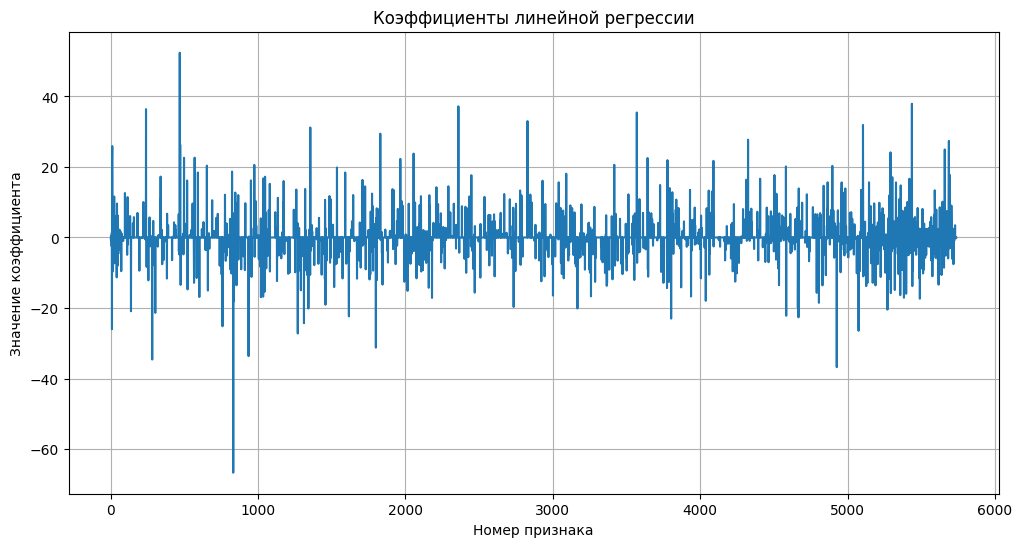


Статистика коэффициентов:
Минимальный коэффициент: -66.7056
Максимальный коэффициент: 52.3842
Среднее абсолютное значение: 1.3303


In [42]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Берем первые 1000 объектов для обучения
X_train_small = X_train.iloc[:1000]
y_train_small = y_train.iloc[:1000]

# Обучаем линейную регрессию
lr = LinearRegression()
lr.fit(X_train_small, y_train_small)

# Предсказания
y_train_pred = lr.predict(X_train_small)
y_test_pred = lr.predict(X_test)

# Метрики на обучающей выборке
mse_train = mean_squared_error(y_train_small, y_train_pred)
r2_train = r2_score(y_train_small, y_train_pred)

# Метрики на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Метрики на обучающей выборке (1000 объектов):")
print(f"MSE: {mse_train:.2f}")
print(f"R²: {r2_train:.4f}")

print("\nМетрики на тестовой выборке:")
print(f"MSE: {mse_test:.2f}")
print(f"R²: {r2_test:.4f}")

# Анализ коэффициентов
plt.figure(figsize=(12, 6))
plt.plot(lr.coef_)
plt.title('Коэффициенты линейной регрессии')
plt.xlabel('Номер признака')
plt.ylabel('Значение коэффициента')
plt.grid(True)
plt.show()

# Статистика по коэффициентам
print(f"\nСтатистика коэффициентов:")
print(f"Минимальный коэффициент: {lr.coef_.min():.4f}")
print(f"Максимальный коэффициент: {lr.coef_.max():.4f}")
print(f"Среднее абсолютное значение: {np.abs(lr.coef_).mean():.4f}")

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

Ненулевых коэффициентов в Lasso: 8
Ненулевых коэффициентов в Ridge: 1247


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+03, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.888e+03, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+03, tolerance: 1.060e

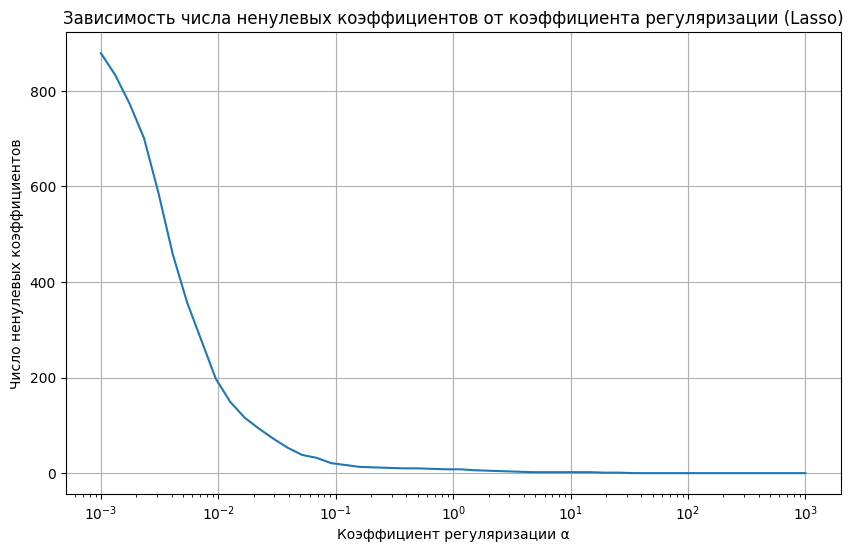


Метрики Ridge регрессии:
RMSE: 8.32
MAE: 5.47
R²: 0.9483

Лучший коэффициент регуляризации: 2.6826957952797246


In [43]:
# Your code here
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

# Lasso регрессия
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_small, y_train_small)

# Ridge регрессия
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_small, y_train_small)

# Анализ ненулевых коэффициентов для Lasso
lasso_non_zero = np.sum(np.abs(lasso.coef_) > 1e-6)
ridge_non_zero = np.sum(np.abs(ridge.coef_) > 1e-6)

print(f"Ненулевых коэффициентов в Lasso: {lasso_non_zero}")
print(f"Ненулевых коэффициентов в Ridge: {ridge_non_zero}")

# График зависимости числа ненулевых коэффициентов от коэффициента регуляризации для Lasso
alphas = np.logspace(-3, 3, 50)
non_zero_counts = []

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha)
    lasso_temp.fit(X_train_small, y_train_small)
    non_zero = np.sum(np.abs(lasso_temp.coef_) > 1e-6)
    non_zero_counts.append(non_zero)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, non_zero_counts)
plt.title('Зависимость числа ненулевых коэффициентов от коэффициента регуляризации (Lasso)')
plt.xlabel('Коэффициент регуляризации α')
plt.ylabel('Число ненулевых коэффициентов')
plt.grid(True)
plt.show()

# Метрики для Ridge регрессии
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nМетрики Ridge регрессии:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}")

# Подбор коэффициента регуляризации для Ridge с кросс-валидацией
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_cv = RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_small, y_train_small)

print(f"\nЛучший коэффициент регуляризации: {ridge_cv.alpha_}")

# Обучение с лучшим alpha
ridge_best = Ridge(alpha=ridge_cv.alpha_)
ridge_best.fit(X_train_small, y_train_small)

# Метрики с подобранным коэффициентом
y_pred_ridge_best = ridge_best.predict(X_test)

# rmse_ridge_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))
# mae_ridge_best = mean_absolute_error(y_test, y_pred_ridge_best)
# r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

# print(f"\nМетрики Ridge регрессии с подобранным коэффициентом:")
# print(f"RMSE: {rmse_ridge_best:.2f}")
# print(f"MAE: {mae_ridge_best:.2f}")
# print(f"R²: {r2_ridge_best:.4f}")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [44]:
# Your code here
rmse_ridge_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))
mae_ridge_best = mean_absolute_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

print(f"\nМетрики Ridge регрессии с подобранным коэффициентом:")
print(f"RMSE: {rmse_ridge_best:.2f}")
print(f"MAE: {mae_ridge_best:.2f}")
print(f"R²: {r2_ridge_best:.4f}")


Метрики Ridge регрессии с подобранным коэффициентом:
RMSE: 8.21
MAE: 5.34
R²: 0.9496


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

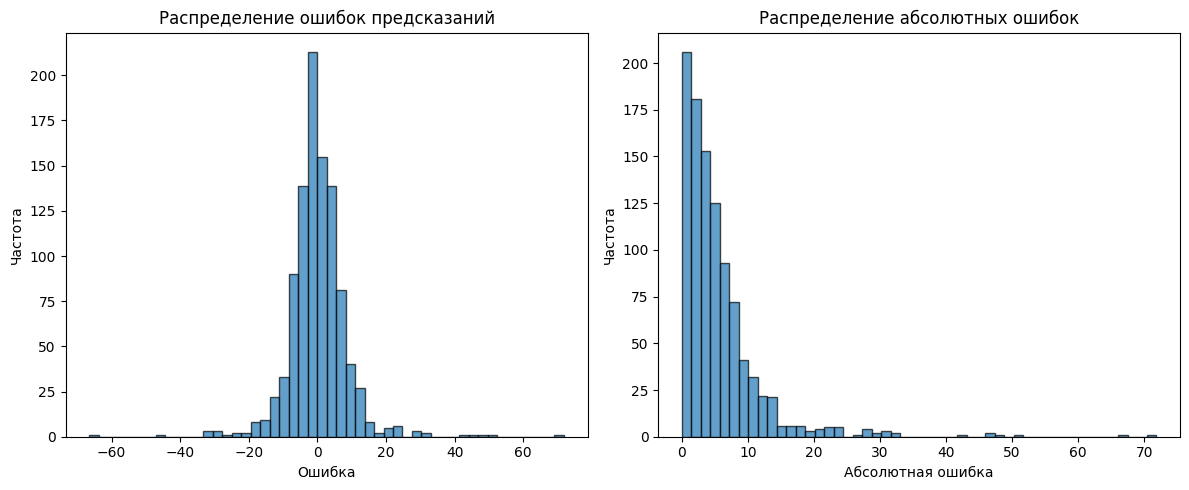

Статистика ошибок:
Средняя ошибка: 0.02
Стандартное отклонение ошибок: 8.57
Максимальная положительная ошибка: 71.84
Максимальная отрицательная ошибка: -66.48

Количество выбросов: 19
Доля выбросов: 0.0190

Наибольшие ошибки: [-31.25468764 -31.64375405  32.03095967  42.88608123 -46.15896778
  46.49015119  48.56300102  50.39323259 -66.48374067  71.83572281]


In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge

# Out-of-Fold предсказания
model = Ridge(alpha=1.0)
oof_predictions = cross_val_predict(model, X_train_small, y_train_small, cv=5)

# Ошибки предсказаний
errors = y_train_small - oof_predictions

# Распределение ошибок
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение ошибок предсказаний')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение абсолютных ошибок')
plt.xlabel('Абсолютная ошибка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Анализ выбросов
print(f"Статистика ошибок:")
print(f"Средняя ошибка: {errors.mean():.2f}")
print(f"Стандартное отклонение ошибок: {errors.std():.2f}")
print(f"Максимальная положительная ошибка: {errors.max():.2f}")
print(f"Максимальная отрицательная ошибка: {errors.min():.2f}")

# Определяем выбросы (ошибки больше 3 стандартных отклонений)
outlier_threshold = 3 * errors.std()
outliers = np.abs(errors) > outlier_threshold

print(f"\nКоличество выбросов: {np.sum(outliers)}")
print(f"Доля выбросов: {np.mean(outliers):.4f}")

# Анализ объектов с наибольшими ошибками
largest_errors_idx = np.argsort(np.abs(errors))[-10:]
print(f"\nНаибольшие ошибки: {errors.iloc[largest_errors_idx].values}")